# Simulation stochastique pour la marche aléatoire

In [1]:
import random

In [2]:
def marche_aleatoire(n): # renvoie les coordonnées après une marche aléatoire de n arrêtes
    x = 0
    y = 0
    for i in range(n):
        step = random.choice(['N', 'S', 'E', 'W'])
        if step == 'N':
            y = y+1
        elif step == 'S':
            y = y-1
        elif step == 'E':
            x = x+1
        else :
            x = x-1
    return (x, y)

In [9]:
marche_aleatoire(6)

(0, 0)

## Distance moyenne à l'origine en fin de marche

In [10]:
def simulations(nombre_de_marches, longueur_max):
    for n in range(1, longueur_max + 1): # n: longueur d'une marche aléatoire
        X = 0 
        for i in range(nombre_de_marches):
            (x, y) = marche_aleatoire(n)
            distance = abs(x) + abs(y)
            X = X + distance
        moyenne = X/nombre_de_marches
        print("Longueur d'une marche = ", n, " , distance moyenne = ", moyenne)

In [16]:
simulations(nombre_de_marches=40000, longueur_max=25)

Longueur d'une marche =  1  , distance moyenne =  1.0
Longueur d'une marche =  2  , distance moyenne =  1.4988
Longueur d'une marche =  3  , distance moyenne =  1.87115
Longueur d'une marche =  4  , distance moyenne =  2.1788
Longueur d'une marche =  5  , distance moyenne =  2.4587
Longueur d'une marche =  6  , distance moyenne =  2.703
Longueur d'une marche =  7  , distance moyenne =  2.93205
Longueur d'une marche =  8  , distance moyenne =  3.1452
Longueur d'une marche =  9  , distance moyenne =  3.3277
Longueur d'une marche =  10  , distance moyenne =  3.52655
Longueur d'une marche =  11  , distance moyenne =  3.68735
Longueur d'une marche =  12  , distance moyenne =  3.88185
Longueur d'une marche =  13  , distance moyenne =  4.0404
Longueur d'une marche =  14  , distance moyenne =  4.1863
Longueur d'une marche =  15  , distance moyenne =  4.33185
Longueur d'une marche =  16  , distance moyenne =  4.4592
Longueur d'une marche =  17  , distance moyenne =  4.60425
Longueur d'une march

## Proportion de marches de longueur inférieure à une valeur donnée

In [17]:
def simulations2(nombre_de_marches, d_max, longueur_max):
    for n in range(1, longueur_max + 1): # n: longueur d'une marche aléatoire
        k = 0 # nombre de marche aléatoire de d_max arrêtes ou moins
        for i in range(nombre_de_marches):
            (x, y) = marche_aleatoire(n)
            distance = abs(x) + abs(y)
            if distance <= d_max:
                k = k + 1
        moyenne = k/nombre_de_marches
        print("Longueur d'une marche = ", n, " , % de distance inférieur ou égale à ", d_max, " = ", 100*moyenne)

La variable aléatoire sous-jacente vaut 1 si la distance en fin de marche est inférieure ou égale à d_max, et 0 sinon.

In [19]:
nombre_de_marches = 30000
d_max = 4
simulations2(nombre_de_marches = nombre_de_marches, d_max = d_max, longueur_max=40)

Longueur d'une marche =  1  , % de distance inférieur ou égale à  4  =  100.0
Longueur d'une marche =  2  , % de distance inférieur ou égale à  4  =  100.0
Longueur d'une marche =  3  , % de distance inférieur ou égale à  4  =  100.0
Longueur d'une marche =  4  , % de distance inférieur ou égale à  4  =  100.0
Longueur d'une marche =  5  , % de distance inférieur ou égale à  4  =  87.91
Longueur d'une marche =  6  , % de distance inférieur ou égale à  4  =  93.74666666666667
Longueur d'une marche =  7  , % de distance inférieur ou égale à  4  =  76.57666666666667
Longueur d'une marche =  8  , % de distance inférieur ou égale à  4  =  86.42999999999999
Longueur d'une marche =  9  , % de distance inférieur ou égale à  4  =  67.33333333333333
Longueur d'une marche =  10  , % de distance inférieur ou égale à  4  =  79.49333333333334
Longueur d'une marche =  11  , % de distance inférieur ou égale à  4  =  59.56333333333333
Longueur d'une marche =  12  , % de distance inférieur ou égale à  4

# Proportion des positions finales

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def effectifs_pos_finale(nombre_de_marches, longueur):
    L = []
    for i in range(nombre_de_marches):
        L.append(marche_aleatoire(longueur))
        
    return {i : L.count(i) for i in set(L)}

In [22]:
def plot_proportion_pos_finale(nombre_de_marches, longueur):
    d = effectifs_pos_finale(nombre_de_marches, longueur)
    X = [x[0] for x in list(d.keys())]
    Y = [x[1] for x in list(d.keys())]
    Z = [d[k] for k in d.keys()]
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(X,Y,Z)

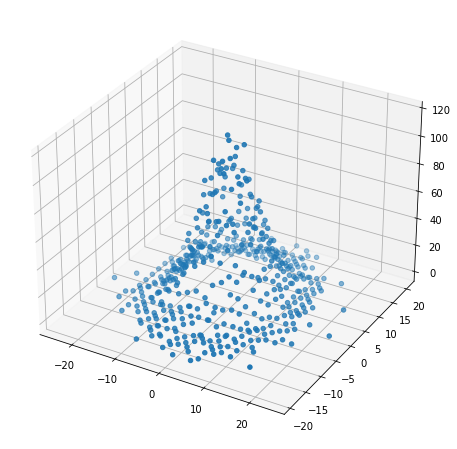

In [23]:
plot_proportion_pos_finale(nombre_de_marches=10000, longueur=60)

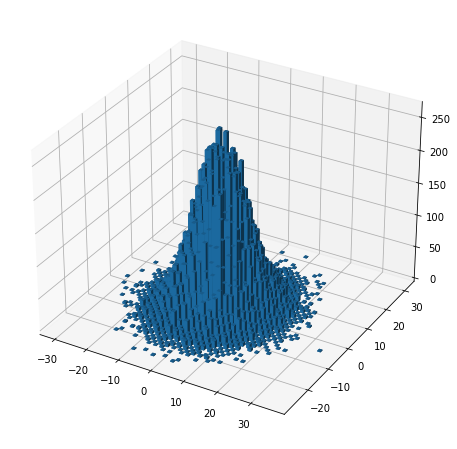

In [24]:
d = effectifs_pos_finale(nombre_de_marches=40000, longueur=100)
X = [x[0] for x in list(d.keys())]
Y = [x[1] for x in list(d.keys())]
Z = [d[k] for k in d.keys()]
bottom = np.zeros_like(Z)
width=1
depth=1
top=Z
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.bar3d(X, Y, bottom, width, depth, top, shade=True)